In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Results 1

Plotting 8 different valves and their diodicity over time to see at which time they start to stabilize

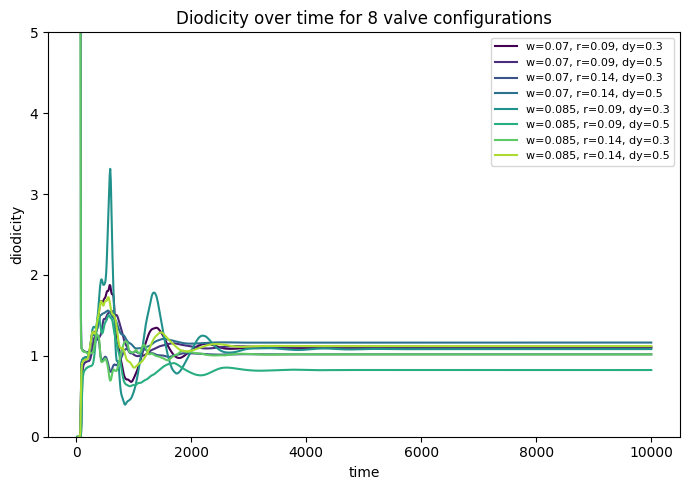

In [14]:

def plot_diodicity_time(
        csv_path, 
        output_base="results/plots/diodicity"
    ):
    # -------------------------
    # Load data
    # -------------------------
    df = pd.read_csv(csv_path)

    # Expect columns: width, radius, dy, timepoint, diodicity
    required_cols = {"width", "radius", "dy", "timepoint", "diodicity"}
    if not required_cols.issubset(df.columns):
        raise ValueError(f"CSV must contain columns: {required_cols}")

    # Drop rows without data
    df = df.dropna(subset=["timepoint", "diodicity"])

    # -------------------------
    # Plot
    # -------------------------
    fig, ax = plt.subplots(figsize=(7, 5))

    groups = df.groupby(["width", "radius", "dy"])
    n = len(groups)
    cmap = plt.get_cmap("viridis")

    for i, ((width, radius, dy), g) in enumerate(groups):
        ax.plot(
            g["timepoint"].values,
            g["diodicity"].values,
            color=cmap(i / n),
            label=f"w={width}, r={radius}, dy={dy}",
        )

    ax.set_xlabel("time")
    ax.set_ylabel("diodicity")
    ax.set_title("Diodicity over time for 8 valve configurations")
    ax.set_ylim((0, 5))
    ax.legend(fontsize=8)

    plt.tight_layout()
    plt.savefig(f"{output_base}_time.png", dpi=300)
    plt.show()


if __name__ == "__main__":
    plot_diodicity_time("results/diodicity_sweep_all.csv")


## Results 2

Plot of diodicity vs width of the pipe

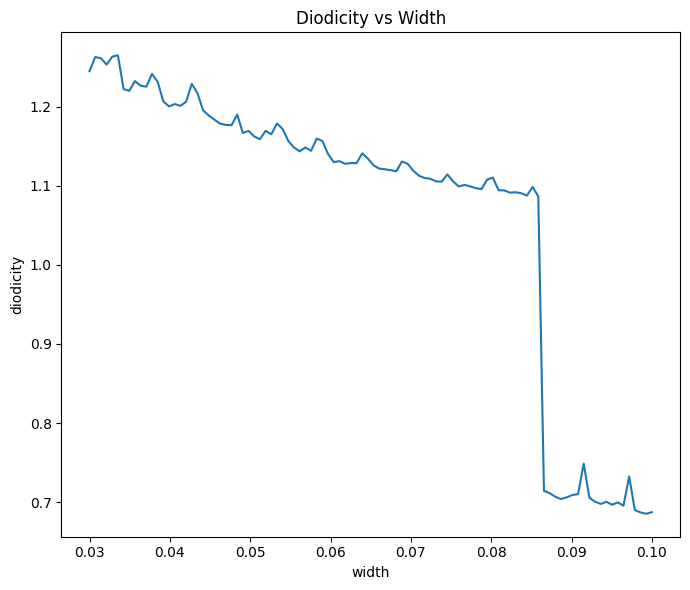

In [18]:
def plot_width(csv_path, output_base="results/plots/diodicity"):
    # Load data
    df = pd.read_csv(csv_path)

    # Use the first two columns: width (x) and diodicity (y)
    x_col, y_col = df.columns[:2]
    x = df[x_col].values
    y = df[y_col].values

    # Create plot
    fig, ax = plt.subplots(figsize=(7, 6))

    ax.plot(
        x,
        y,
    )

    ax.set_xlabel(x_col)
    ax.set_ylabel(y_col)
    ax.set_title("Diodicity vs Width")

    plt.tight_layout()
    plt.savefig(f"{output_base}_width.png", dpi=300)
    plt.show()

if __name__ == "__main__":
    plot_width("results/diodicity_vs_width.csv")


## Results 3

3d plot and heatmap of our surface surface values

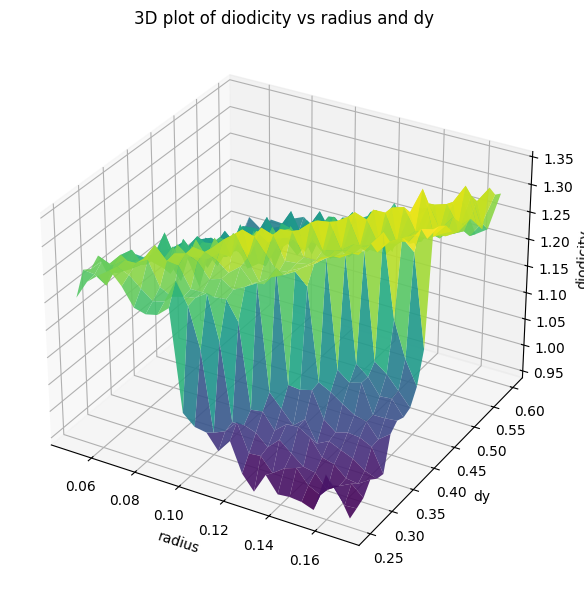

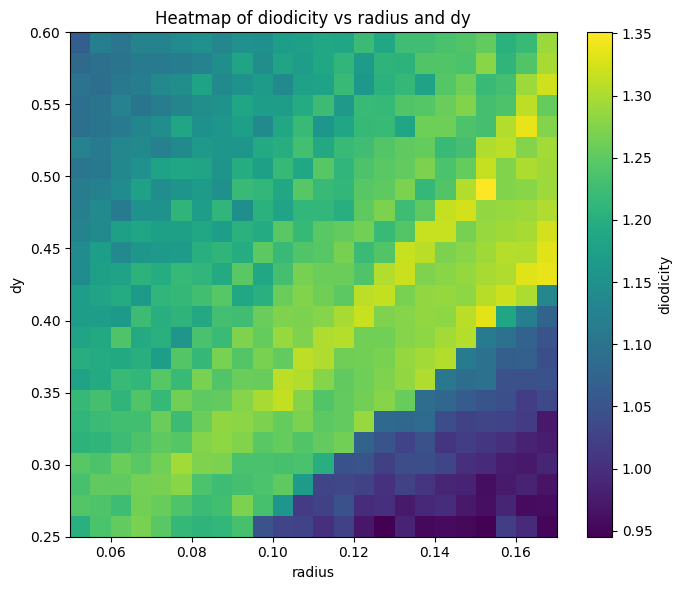

In [15]:

def plot_3d_and_heatmap_full_sweep(csv_path, output_base="results/plots/diodicity"):
    # -----------------------
    # Load data
    # -----------------------
    df = pd.read_csv(csv_path)

    # Column names (edit if needed)
    x_col, y_col, z_col = df.columns[:3]

    # -----------------------
    # Pivot full sweep to grid
    # -----------------------
    Z_df = df.pivot(index=y_col, columns=x_col, values=z_col)

    X_vals = Z_df.columns.values
    Y_vals = Z_df.index.values
    Z = Z_df.values

    X, Y = np.meshgrid(X_vals, Y_vals)

    # =======================
    # 3D SURFACE PLOT
    # =======================
    fig = plt.figure(figsize=(7, 6))
    ax = fig.add_subplot(111, projection="3d")

    ax.plot_surface(
        X, Y, Z,
        cmap="viridis",
        edgecolor="none",
        alpha=0.9
    )

    ax.set_xlabel(x_col)
    ax.set_ylabel(y_col)
    ax.set_zlabel(z_col)
    ax.set_title("3D plot of diodicity vs radius and dy")

    plt.tight_layout()
    plt.savefig(f"{output_base}_surface_3d.png", dpi=300)
    plt.show()

    # =======================
    # TOP-DOWN HEATMAP
    # =======================
    fig, ax = plt.subplots(figsize=(7, 6))

    im = ax.imshow(
        Z,
        origin="lower",
        aspect="auto",
        extent=[X_vals.min(), X_vals.max(), Y_vals.min(), Y_vals.max()],
        cmap="viridis"
    )

    ax.set_xlabel(x_col)
    ax.set_ylabel(y_col)
    ax.set_title("Heatmap of diodicity vs radius and dy")

    plt.colorbar(im, ax=ax, label=z_col)

    plt.tight_layout()
    plt.savefig(f"{output_base}_heatmap_topdown.png", dpi=300)
    plt.show()


if __name__ == "__main__":
    plot_3d_and_heatmap_full_sweep("results/diodicity_surface.csv")
